In [112]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [113]:
#read the loan file and explore the date
loan =pd.read_csv('https://raw.githubusercontent.com/ganeshbabuNN/lendingCludCaseStudy/master/loan.csv')
loan_df=loan #create a new dt

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [114]:
#printing the shape of the dataframe
loan.shape

(39717, 111)

In [115]:
#display the top 5 row
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [116]:
#display the tail 5 row
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [117]:
#pd.options.display.max_info_columns #global options for the maximum column info
#check the details of the data like columns names, total number of non-null values and data type of each of the columns
loan.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
loan.shape

(39717, 111)

In [119]:
#options to set the maximum rows.
pd.set_option('max_rows',1111)
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [120]:
#important factor variable
#loan_amt, term, interest_rate , Grade, subgrade,annual income , purpose of loan, DTI (debt to income),
#emp_length,loan_date(month)
loan[['term']]
loan[['int_rate']]
loan[['grade']]
loan['sub_grade'].unique()
loan['grade'].unique()
loan['purpose']
loan['dti']
loan['emp_length'].unique()
loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [121]:
#numerical derviations and converations
#replace the month in the term column and replace with null value
loan_df['term_month']=loan_df.term.apply(lambda x:x.replace(' months','')).astype('int')
#remove the interest rate percentage and convert to float
loan_df['int_rate_per']=pd.Series(loan_df['int_rate']).str.replace('%','').astype(float)
#remove the interest rate percentage and convert to float
loan_df["revol_util_per"] = pd.Series(loan["revol_util"]).str.replace("%", "").astype(float)

In [122]:
#categorical derviations and converations
loan_df['grade']=loan_df['grade'].astype("category") #converting grade to category
loan_df['sub_grade']=loan_df['sub_grade'].astype("category") #converting grade to category
loan_df['purpose']=loan_df['purpose'].astype("category") #converting grade to category

In [123]:
#date conversations
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [124]:
#columns which are important
loan_df[['term','term_month','int_rate','int_rate_per','grade','sub_grade','purpose','dti','emp_length','issue_d']]

,term,term_month,int_rate,int_rate_per,grade,sub_grade,purpose,dti,emp_length,issue_d
0,36 months,36,10.65%,10.65,B,B2,credit_card,27.65,10+ years,Dec-11
1,60 months,60,15.27%,15.27,C,C4,car,1.00,< 1 year,Dec-11
2,36 months,36,15.96%,15.96,C,C5,small_business,8.72,10+ years,Dec-11
3,36 months,36,13.49%,13.49,C,C1,other,20.00,10+ years,Dec-11
4,60 months,60,12.69%,12.69,B,B5,other,17.94,1 year,Dec-11
...,...,...,...,...,...,...,...,...,...,...
39712,36 months,36,8.07%,8.07,A,A4,home_improvement,11.33,4 years,Jul-07
39713,36 months,36,10.28%,10.28,C,C1,credit_card,6.40,3 years,Jul-07
39714,36 months,36,8.07%,8.07,A,A4,debt_consolidation,2.30,< 1 year,Jul-07
39715,36 months,36,7.43%,7.43,A,A2,other,3.72,< 1 year,Jul-07


In [125]:
#options to set the maximum rows.
pd.set_option('max_rows',1111)
loan_df.dtypes

id                                   int64
member_id                            int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                            object
installment                        float64
grade                             category
sub_grade                         category
emp_title                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                             object
loan_status                         object
pymnt_plan                          object
url                                 object
desc                                object
purpose                           category
title                               object
zip_code                            object
addr_state 

## missing values

In [126]:
### percentage of missing values
pd.set_option('max_rows',1111)
print(loan_df.shape)
total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (round(loan_df.isnull().sum()/loan_df.isnull().count(),4)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(200)

(39717, 114)


,Total,Percent
tot_coll_amt,39717,100.00
mths_since_recent_bc_dlq,39717,100.00
total_bal_il,39717,100.00
mo_sin_rcnt_tl,39717,100.00
mo_sin_rcnt_rev_tl_op,39717,100.00
mo_sin_old_rev_tl_op,39717,100.00
mo_sin_old_il_acct,39717,100.00
bc_util,39717,100.00
bc_open_to_buy,39717,100.00
avg_cur_bal,39717,100.00


In [127]:
# loan_df['application_type'].unique()
# loan_df['policy_code'].unique()
# loan_df['pymnt_plan'].unique()
# loan_df['initial_list_status'].unique()

In [128]:
#dropping every column which contains completely null value or Null column
loan_df.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint',
              'tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
              'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
              'all_util','total_rev_hi_lim','inq_fi', 'total_cu_tl','inq_last_12m','acc_open_past_24mths',
              'avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct',
              'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
              'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
              'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
              'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
              'num_tl_op_past_12m', 'pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit',
              'total_il_high_credit_limit'], axis=1, inplace=True)
#dropping every column which contains either zero or null.
loan_df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med']
            , axis=1, inplace=True)
#dropping every column application_type,policy_code,pymnt_plan,initial_list_status 
#which contains 'INDIVIDUAL','1','n','f'
loan_df.drop(['pymnt_plan','policy_code','application_type','initial_list_status'],axis=1, inplace=True)
#Dropping columns that are not required
loan_df.drop(['url','desc','title', 'zip_code', 'id', 'member_id'], axis=1, inplace=True)
# Also removing these rows as more than 60-90% of columns are NA
loan_df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)

In [129]:
#checking the above deletions columns are not applicable
print(loan_df.shape)
loan_df.isnull().sum().sort_values(ascending=False)

(39717, 42)


emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util_per               50
revol_util                   50
last_credit_pull_d            2
total_rec_prncp               0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
recoveries                    0
total_rec_int                 0
total_rec_late_fee            0
pub_rec                       0
collection_recovery_fee       0
last_pymnt_amnt               0
term_month                    0
int_rate_per                  0
revol_bal                     0
loan_amnt                     0
funded_amnt                   0
annual_inc                    0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_own

In [130]:
#columns which are important
loan_df[['term','term_month','int_rate','int_rate_per','grade','sub_grade','purpose','dti','emp_length','issue_d']]
# loan_df.info()

,term,term_month,int_rate,int_rate_per,grade,sub_grade,purpose,dti,emp_length,issue_d
0,36 months,36,10.65%,10.65,B,B2,credit_card,27.65,10+ years,Dec-11
1,60 months,60,15.27%,15.27,C,C4,car,1.00,< 1 year,Dec-11
2,36 months,36,15.96%,15.96,C,C5,small_business,8.72,10+ years,Dec-11
3,36 months,36,13.49%,13.49,C,C1,other,20.00,10+ years,Dec-11
4,60 months,60,12.69%,12.69,B,B5,other,17.94,1 year,Dec-11
...,...,...,...,...,...,...,...,...,...,...
39712,36 months,36,8.07%,8.07,A,A4,home_improvement,11.33,4 years,Jul-07
39713,36 months,36,10.28%,10.28,C,C1,credit_card,6.40,3 years,Jul-07
39714,36 months,36,8.07%,8.07,A,A4,debt_consolidation,2.30,< 1 year,Jul-07
39715,36 months,36,7.43%,7.43,A,A2,other,3.72,< 1 year,Jul-07


## data imputations required

In [137]:
loan_df['emp_title'] #SELF_EMPLOYED
loan_df.loc[pd.isnull(loan_df['emp_title']),['emp_title']]='SELF_EMPLOYED'
loan_df.loc[pd.isnull(loan_df['emp_length']), ['emp_length']] = 'NOT_KNOWN'
loan_df.loc[pd.isnull(loan_df['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = '-1' ## No Data
loan_df.loc[pd.isnull(loan_df['last_credit_pull_d']), ['last_credit_pull_d']] = 'NO_DATA'
loan_df.loc[pd.isnull(loan_df['last_pymnt_d']), ['last_pymnt_d']] = 'NO_DATA'
loan_df.loc[pd.isnull(loan_df['revol_util']), ['revol_util']] = 0

In [194]:
loan_df.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries

In [140]:
## Finding Categorical and numeric columns
numerical_feats = loan_df.dtypes[loan_df.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_feats))

categorical_feats = loan_df.dtypes[loan_df.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_feats))


print("categorical_feats",categorical_feats)
print("numerical_feats",numerical_feats)

# of Numerical features:  28
# of Categorical features:  14
categorical_feats Index(['term', 'int_rate', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')
numerical_feats Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'sub_grade', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'term_month',
       'int_rate_per', 'revol_util_per'],
      dtype='object')


## dervied Metrics

In [148]:
#Defining the loan income ratio
loan_df['loan_income_ratio']=loan_df['loan_amnt']/loan_df['annual_inc']
#Defining the loan issue 
loan_df['issue_month'],loan_df['issue_year']=loan_df['issue_d'].str.split('-',1).str
loan_df[['issue_d','issue_month','issue_year']].head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  after removing the cwd from sys.path.


,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


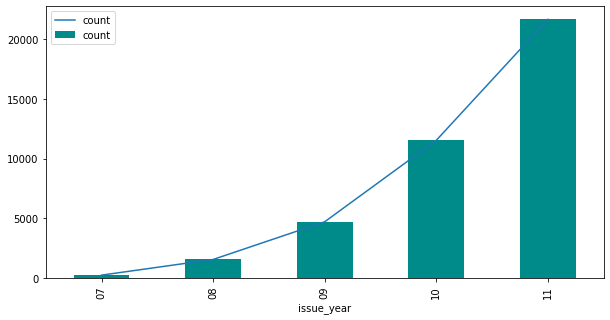

In [160]:
year_wise=loan_df.groupby(by=[loan_df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(10,5),ax = ax,color = "darkcyan")
plt.show()

<b> Inference: </b> <br>
There is a steady increase in the issuance of loan

In [193]:
# Annual Income Range
bins = [0, 50000, 100000, 200000, 400000, 6000000]
slot = ['< 50k', '50k - 1L', '1L - 2L', '2L - 4L', '4L +']
loan_df['annual_inc_type'] = pd.cut(loan_df['annual_inc'], bins, labels=slot)
print(loan_df['annual_inc_type'].describe())
# Loan Amount Range
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins, labels=slot)
print(loan_df['loan_amnt_range'].describe())
# Interest Rate Range
bins = [0, 6, 12, 18, 25]
slot = ['0-6', '7-12', '13-18', '19-25']
loan_df['int_rate_type'] = pd.cut(loan_df['int_rate_per'], bins, labels=slot)
print(loan_df['int_rate_type'].describe())

count        39717
unique           5
top       50k - 1L
freq         18286
Name: annual_inc_type, dtype: object
count          39717
unique             6
top       5000-10000
freq           12960
Name: loan_amnt_range, dtype: object
count     39717
unique        4
top        7-12
freq      19621
Name: int_rate_type, dtype: object


# Data analysis